In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mixup algorithm implementation
def mixup(x, y, alpha):
    
    lam = alpha

    batch_size = x.shape[0]
    index = np.random.permutation(batch_size)

    mixed_x = lam * x + (1 - lam) * x[index, :]
    mixed_y = lam * y + (1 - lam) * y[index]
    return mixed_x, mixed_y

In [3]:
# Load the dataset
df = pd.read_csv('data//vcf_with_labels.csv')

# Drop unrelated columns
df = df.drop(columns=['samples', 'score'])

# Split data into features and labels
X = df.drop(columns=['label']).values
y = df['label'].values

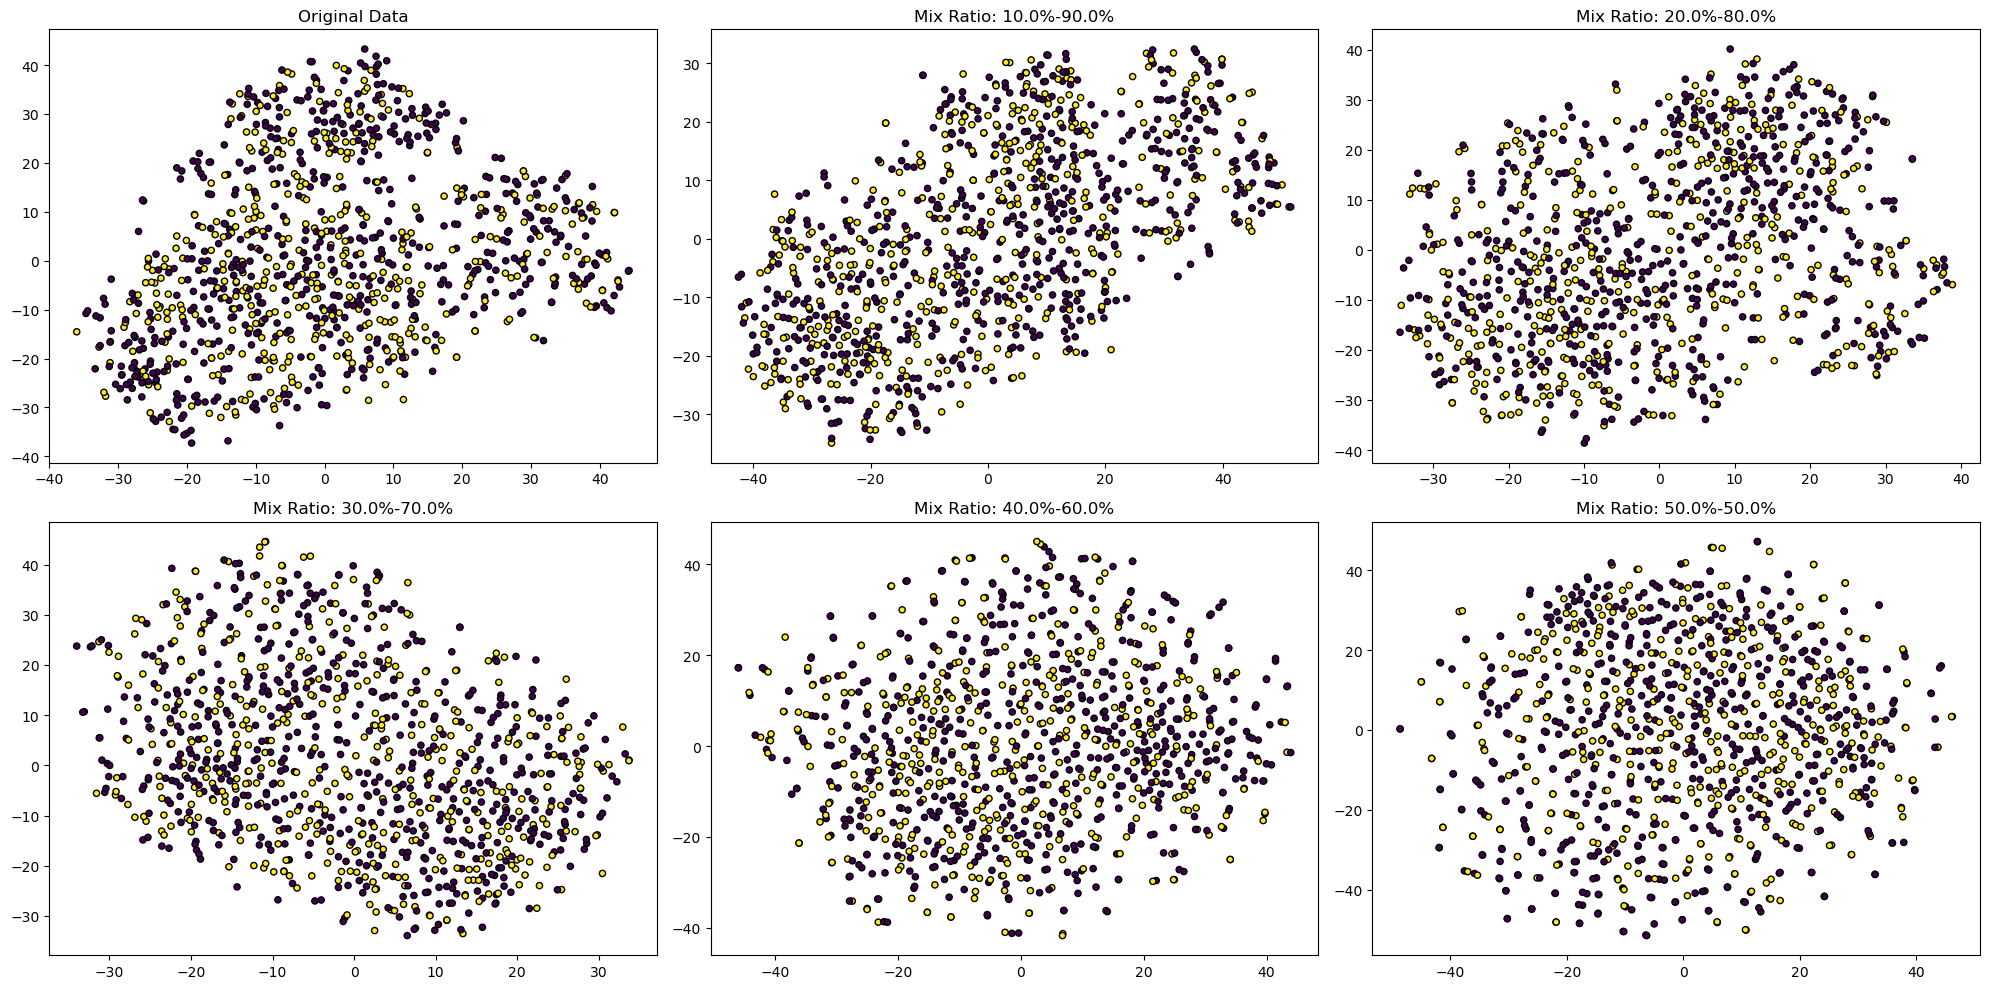

In [4]:
ratios = [(0.1, 0.9), (0.2, 0.8), (0.3, 0.7), (0.4, 0.6), (0.5, 0.5)]

plt.figure(figsize=(20, 10))

# Plot for the original dataset
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)
plt.subplot(2, 3, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
plt.title('Original Data')

# Plots for the augmented datasets
for i, (alpha, _) in enumerate(ratios, 2):
    X_mixed, _ = mixup(X, y, alpha)
    
    # Use t-SNE for dimensionality reduction
    X_tsne_mixed = tsne.fit_transform(X_mixed)
    
    plt.subplot(2, 3, i)
    plt.scatter(X_tsne_mixed[:, 0], X_tsne_mixed[:, 1], c=y, cmap='viridis', edgecolor='k', s=20)
    plt.title(f'Mix Ratio: {alpha*100}%-{(1-alpha)*100}%')

plt.tight_layout()
plt.show()